# Importando bibliotecas

In [1]:
# biblotecas para manipulação de dados
import pandas as pd
import numpy as np

#biblioteca para visualização de dados
import matplotlib.pyplot as plt

#Bibliotecas auxiliares
import os
from functools import reduce
import re
from unidecode import unidecode
import datetime

#Biblioteca propria
import sys
sys.path.append("../src/")
from eda.eda import describe
from io_pyarrow.io_pyarrow import pyarrow_read_csv,write_table_from_pandas,read_table_to_pandas #leitura e escrita de arquivos csv grandes

%matplotlib inline
%reload_ext watermark
%watermark --iversions

re        : 2.2.1
sys       : 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
numpy     : 1.16.4
datetime  : 4.3
pandas    : 1.1.4
matplotlib: 3.3.2



___

# Importando arquivos

In [2]:
#Definindo path dos arquivos
path_data = "../data/raw/"

## OpenData SUS

fonte: https://opendatasus.saude.gov.br/dataset

In [3]:
respiradores = pyarrow_read_csv(path_data + "OpenDataSUS/distribuicao_respiradores.csv",sep=";")

___

# Analisando as bases de dados

In [4]:
describe(respiradores)

Quantidade de linhas: 2652


variable    type  na na_pct  unique min quat25 median      mean  \
0              DATA  object   0   0.0%     129   -      -      -         -   
1        FORNECEDOR  object   0   0.0%      27   -      -      -         -   
2           DESTINO  object   0   0.0%      30   -      -      -         -   
3  ESTADO/MUNICIPIO  object   0   0.0%       4   -      -      -         -   
4              TIPO  object   0   0.0%       4   -      -      -         -   
5        QUANTIDADE   int64   0   0.0%      53   0    2.0    3.0  7.049397   
6             VALOR  object   0   0.0%     121   -      -      -         -   
7      DESTINATARIO  object   0   0.0%    1763   -      -      -         -   
8                UF  object   0   0.0%      32   -      -      -         -   
9   DATA DE ENTREGA  object   0   0.0%     279   -      -      -         -   

  quat75  max        std skewness kurtosis media_desvio  
0      -    -          -        -        -            -  
1      -    -          -        -        -            -  
2      -    -          -        -        -            -  
3      -    -          -        -        -            -  
4      -    -          -        -        -            -  
5    6.0  300  13.511169     8.32   125.53         0.52  
6      -    -          -        -        -            -  
7      -    -          -        -        -            -  
8      -    -          -        -        -            -  
9      -    -          -        -        -            -

In [5]:
respiradores_ = respiradores.copy()

In [6]:
respiradores_.head()

DATA FORNECEDOR DESTINO ESTADO/MUNICIPIO        TIPO  QUANTIDADE  \
0  21/05/2020     VYAIRE    ACRE           ESTADO         UTI          20   
1  21/05/2020   MAGNAMED    ACRE           ESTADO  TRANSPORTE          10   
2  05/06/2020   LEISTUNG    ACRE           ESTADO         UTI          30   
3  16/06/2020     VYAIRE    ACRE        MUNICIPIO         UTI           5   
4  16/06/2020   MAGNAMED    ACRE        MUNICIPIO  TRANSPORTE           5   

             VALOR                                       DESTINATARIO  UF  \
0  R$ 1.200.000,00             b'Secretaria Estadual de Sa\xc3\xbade'  AC   
1    R$ 482.900,00             b'Secretaria Estadual de Sa\xc3\xbade'  AC   
2  R$ 1.800.000,00             b'Secretaria Estadual de Sa\xc3\xbade'  AC   
3    R$ 300.000,00  b'Secretaria Municipal de Sa\xc3\xbade (Sena M...  AC   
4    R$ 241.450,00  b'Secretaria Municipal de Sa\xc3\xbade (Sena M...  AC   

  DATA DE ENTREGA  
0      23/05/2020  
1      23/05/2020  
2      08/06/2020  
3      24/06/2020  
4      24/06/2020

## DATA

In [7]:
#Quantas datas não podem ser convertidas de string para datetime?
pd.to_datetime(respiradores.DATA,errors='coerce',format="%d/%m/%Y").isna().sum()

14

In [8]:
#Alguns casos possuem as horas, por isso, vamos apenas extrair os textos da data
pd.DataFrame({"original":respiradores.DATA,"to_date":pd.to_datetime(respiradores.DATA,errors='coerce',format="%d/%m/%Y")}).query("to_date!=to_date")

original to_date
90    25/01/2021 00:00     NaT
91    25/01/2021 00:00     NaT
93    05/02/2021 00:00     NaT
94    05/02/2021 00:00     NaT
865   16/04/2021 00:00     NaT
866   16/04/2021 00:00     NaT
867   16/04/2021 00:00     NaT
868   16/04/2021 00:00     NaT
869   16/04/2021 00:00     NaT
870   16/04/2021 00:00     NaT
871   16/04/2021 00:00     NaT
872   16/04/2021 00:00     NaT
1128  08/12/2020 00:00     NaT
1197  30/04/2020 00:00     NaT

In [9]:
respiradores.DATA = respiradores.DATA.apply(lambda x: re.findall("[0-9]+/[0-9]+/[0-9+]+",x)[0])

In [10]:
pd.DataFrame({"original":respiradores.DATA,"to_date":pd.to_datetime(respiradores.DATA,errors='coerce',format="%d/%m/%Y")}).query("to_date!=to_date")

Empty DataFrame
Columns: [original, to_date]
Index: []

In [11]:
respiradores.DATA = pd.to_datetime(respiradores.DATA,errors='coerce',format="%d/%m/%Y")

## FORNECEDOR

In [12]:
respiradores.FORNECEDOR.value_counts()

MAGNAMED                                812
KTK                                     609
VYAIRE                                  597
VYAIRE LTV 2200 USA                     151
LIFEMED                                 123
LEISTUNG                                116
INSPIRAR                                 64
LIFEMED                                  54
WEG                                      31
HORTRON                                  25
RUSSER BRASIL                            25
INSPIRAR                                 10
LEISTUNG                                  8
VYAIRE                                    5
VYAIRE LTV 1200 USA                       5
MAGNAMED-REQUISIÇÃO                       3
HORTRON                                   3
VYAIRE/INTERMED                           2
LEISTUNG/VYAIRE                           1
L C DADDE COM AT INST MAT MEDICO EPP      1
UTI                                       1
KTK/VAYIRE                                1
ALLIAGE                         

In [13]:
#Convertendo para dados categoricos
respiradores.FORNECEDOR = pd.Categorical(respiradores.FORNECEDOR,categories=respiradores.FORNECEDOR.value_counts().index)

## DESTINO

In [14]:
#Há destinos internos e externos
respiradores.DESTINO.value_counts()

BAHIA                  256
PARANA                 243
GOIAS                  242
RIO GRANDE DO SUL      236
MINAS GERAIS           212
SÃO PAULO              201
RIO DE JANEIRO         195
PARAIBA                111
CEARA                  103
MARANHÃO                94
RONDONIA                88
PERNAMBUCO              85
ESPIRITO SANTO          69
PARA                    63
MATO GROSSO DO SUL      56
SANTA CATARINA          56
MATO GROSSO             54
TOCANTINS               53
PIAUI                   49
RIO GRANDE DO NORTE     44
AMAZONAS                41
ALAGOAS                 28
SERGIPE                 17
AMAPA                   14
ACRE                    13
DISTRITO FEDERAL        13
RORAIMA                 11
PERU                     2
HAITI                    2
LIBANO                   1
Name: DESTINO, dtype: int64

In [15]:
# Vamos converter os estados para siglas, para facilitar possíveis futuros joins com outras tabelas
respiradores.DESTINO = respiradores.DESTINO.replace({"RORAIMA":"RR",
                                                     "DISTRITO FEDERAL":"DF",
                                                      "ACRE": "AC",
                                                      "AMAPA":"AP",
                                                      "AMAZONAS": "AM",
                                                      "SERGIPE":"SE",
                                                      "ALAGOAS":"AL",
                                                      "RIO GRANDE DO NORTE": "RN",
                                                      "PIAUI":"PI",
                                                      "TOCANTINS":"TO",
                                                      "MATO GROSSO ":"MT",
                                                      "SANTA CATARINA":"SC",
                                                      "MATO GROSSO DO SUL":"MS",
                                                      "PARA":"PA",
                                                      "ESPIRITO SANTO ":"ES",
                                                      "PERNAMBUCO":'PE',
                                                      "RONDONIA":"RO",
                                                      "MARANHÃO":"MA",
                                                      "CEARA":"CE",
                                                      "PARAIBA":"PB",
                                                      "RIO DE JANEIRO":"RJ",
                                                      "SÃO PAULO":"SP",
                                                      "MINAS GERAIS":"MG",
                                                      "RIO GRANDE DO SUL ":"RS",
                                                      "BAHIA":"BA",
                                                      "GOIAS":"GO",
                                                      "PARANA":"PR",
                                                      "PERU":np.nan,
                                                      "HAITI ":np.nan,
                                                      "LIBANO":np.nan})

In [16]:
#Definindo destino interno e destino externo
respiradores["DESTINO_INTERNO"] = respiradores.DESTINO.apply(lambda x: True if x == x else False)

In [17]:
respiradores["DESTINO_INTERNO"].value_counts()

True     2647
False       5
Name: DESTINO_INTERNO, dtype: int64

In [18]:
#Convertendo DESTINO para dados categoricos
respiradores.DESTINO = pd.Categorical(respiradores.DESTINO,categories=respiradores.DESTINO.value_counts().index)

## ESTADO/MUNICIPIO

In [19]:
#Alterando nome para remover '/'
respiradores = respiradores.rename(columns={"ESTADO/MUNICIPIO":"ESTADO_MUNICIPIO"})

In [20]:
respiradores.ESTADO_MUNICIPIO.value_counts()

MUNICIPIO    2215
ESTADO        408
ESTADO         24
-               5
Name: ESTADO_MUNICIPIO, dtype: int64

In [21]:
#Corrigindo os valores
respiradores.ESTADO_MUNICIPIO.replace({"ESTADO ":"ESTADO",
                                       "-":np.nan}).value_counts(dropna=False)

MUNICIPIO    2215
ESTADO        432
NaN             5
Name: ESTADO_MUNICIPIO, dtype: int64

In [22]:
#Convertendo para dados categoricos
respiradores.ESTADO_MUNICIPIO = pd.Categorical(respiradores.ESTADO_MUNICIPIO.replace({"ESTADO ":"ESTADO","-":np.nan}),
                                               categories = ["MUNICIPIO","ESTADO"])

## TIPO

In [23]:
respiradores.TIPO.value_counts(dropna=False)

TRANSPORTE        1254
UTI               1242
TRANSPORTE USA     145
Transporte USA      11
Name: TIPO, dtype: int64

In [24]:
#Deixando tudo com letra maiúscula e convertendo para dados categoricos
respiradores.TIPO = pd.Categorical(respiradores.TIPO.str.upper(),categories=respiradores.TIPO.str.upper().unique())

## QUANTIDADE

In [25]:
#Existem alguns envios que estão zerados. Eles necessitam então estar na base?
respiradores.QUANTIDADE.describe()

count    2652.000000
mean        7.049397
std        13.511169
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       300.000000
Name: QUANTIDADE, dtype: float64

In [26]:
respiradores.query("QUANTIDADE == 0")

DATA FORNECEDOR DESTINO ESTADO_MUNICIPIO        TIPO  QUANTIDADE  \
450 2021-03-11        KTK      CE        MUNICIPIO  TRANSPORTE           0   

       VALOR                                  DESTINATARIO  UF  \
450  R$ 0,00  b'SECRETARIA MUNICIPAL DE SAUDE DE PARACURU'  CE   

    DATA DE ENTREGA  DESTINO_INTERNO  
450      15/03/2021             True

In [27]:
#Vamos remover esse registro da tabela, pois ele não agrega informação
respiradores = respiradores.query("QUANTIDADE > 0")

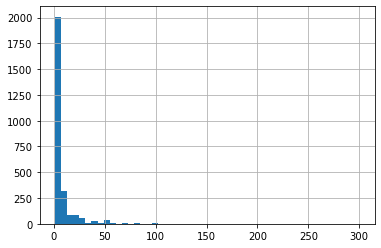

In [28]:
respiradores.QUANTIDADE.hist(bins=50)
plt.show()

## VALOR

In [29]:
#São valores numéricos, mas escritos como string. Vamos converter
respiradores.VALOR

0        R$ 1.200.000,00
1          R$ 482.900,00
2        R$ 1.800.000,00
3          R$ 300.000,00
4          R$ 241.450,00
              ...       
2647    R$ 14.487.000,00
2648     R$ 6.000.000,00
2649     R$ 4.600.000,00
2650     R$ 1.000.000,00
2651     R$ 3.000.000,00
Name: VALOR, Length: 2651, dtype: object

In [30]:
respiradores.VALOR = respiradores.VALOR.str.replace(pat=".",repl="").str.replace(",",".").apply(lambda x: float(re.findall("[0-9]+.[0-9]{2}",x)[0]))

<ipython-input-30-75a80ab3524b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  respiradores.VALOR = respiradores.VALOR.str.replace(pat=".",repl="").str.replace(",",".").apply(lambda x: float(re.findall("[0-9]+.[0-9]{2}",x)[0]))


## DESTINATARIO

In [31]:
respiradores.DESTINATARIO = respiradores_.DESTINATARIO.copy()

In [32]:
#Os valores de destinatários estão codificados. Vamos decodificá-los
respiradores.DESTINATARIO.value_counts()

b'Secretaria Estadual de Sa\xc3\xbade'                           169
b'ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE JANEIRO'         18
b'Secretaria Municipal de Sa\xc3\xbade'                            9
b'SECRETARIA ESTADUAL DE SA\xc3\x9aDE DO AMAZONAS '                8
b'Almox Central da SMS de Curitiba'                                8
                                                                ... 
b'SMS de Moipora'                                                  1
b'Secretaria Municipal de Sa\xc3\xbade (CACOAL)'                   1
b'ALTO PARA\xc3\x8dSO - Secretaria Municipal de Sa\xc3\xbade'      1
b'HOSPITAL SANTO ANTONIO MARIA ZACCARIA'                           1
b'SMS DE GIRUA  RS'                                                1
Name: DESTINATARIO, Length: 1762, dtype: int64

In [33]:
#Estamos tendo um erro de conversão para um caso. Vamos verificar se existem mais casos com problema
for i,byte in respiradores.DESTINATARIO.iteritems():
    print(i,byte)
    byte.decode("utf-8")

0 b'Secretaria Estadual de Sa\xc3\xbade'
1 b'Secretaria Estadual de Sa\xc3\xbade'
2 b'Secretaria Estadual de Sa\xc3\xbade'
3 b'Secretaria Municipal de Sa\xc3\xbade (Sena Madureira)'
4 b'Secretaria Municipal de Sa\xc3\xbade (Sena Madureira)'
5 b'Secretaria Municipal de Sa\xc3\xbade (Cruzeiro do Sul)'
6 b'Secretaria Municipal de Sa\xc3\xbade (Cruzeiro do Sul)'
7 b'Cruzeiro do Sul - Hoaspital Regional de Juru\xc3\xa1'
8 b'RIO BRANCO - Secretaria Estadual de Sa\xc3\xbade'
9 b'RIO BRANCO - Secretaria Estadual de Sa\xc3\xbade'
10 b'SES ACRE'
11 b'SECRETARIA ESTADUAL DE SAUDE'
12 b'SECRETARIA ESTADUAL DE SAUDE'
13 b'Secretaria Estadual de Sa\xc3\xbade'
14 b'Secretaria Estadual de Sa\xc3\xbade'
15 b'Secretaria Estadual de Sa\xc3\xbade'
16 b'Secretaria Estadual de Sa\xc3\xbade'
17 b'Secretaria Estadual de Sa\xc3\xbade'
18 b'Secretaria Estadual de Sa\xc3\xbade'
19 b'Secretaria Municipal de Sa\xc3\xbade (BELO MONTE)'
20 b'Secretaria Municipal de Sa\xc3\xbade (MAJOR IZIDORO)'
21 b'Secretaria Munic

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfa in position 25: invalid start byte

In [34]:
def try_decode(x):
    try:
        x.decode("utf-8")
        decode = 1
    except:
        decode = 0
    
    return (decode,x)
#Temos duas string que não puderam ser convertidas. Vamos verificar quem são
respiradores.DESTINATARIO.apply(try_decode).apply(lambda x: x[0]).value_counts()

1    2649
0       2
Name: DESTINATARIO, dtype: int64

In [35]:
code_nao_convertiveis = np.unique([code for flag,code in respiradores.DESTINATARIO.apply(try_decode).to_list() if flag == 0])
code_nao_convertiveis

array([b'Secretaria Estadual de Sa\xfade'], dtype='|S28')

In [36]:
#Basta então substituir esse codigo com erro e faremos a conversão com sucesso
respiradores.DESTINATARIO = respiradores.DESTINATARIO.replace({b'Secretaria Estadual de Sa\xfade':
                                                               b'Secretaria Estadual de Sa\xc3\xbade'}).str.decode("utf-8").str.upper()

#Removendo acentos
respiradores.DESTINATARIO = respiradores.DESTINATARIO.apply(unidecode).str.rstrip()

In [37]:
respiradores.DESTINATARIO.value_counts()

SECRETARIA ESTADUAL DE SAUDE                              173
ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE JANEIRO     18
SECRETARIA MUNICIPAL DE SAUDE                               9
SECRETARIA ESTADUAL DE SAUDE DO AMAZONAS                    8
ALMOX CENTRAL DA SMS DE CURITIBA                            8
                                                         ... 
SECRETARIA MUNICIPAL DE SAUDE DE ARAGUAP                    1
HOSPITAL MUNICIPAL NOSSA SENHORA DAS DORES                  1
SMS DE SAO JOSE DO CALCADO                                  1
SECR. MUN. DE SAUDE DE UNIAO                                1
ARRAIAS - HOSPITAL REGIONAL DE ARRAIAS                      1
Name: DESTINATARIO, Length: 1739, dtype: int64

In [38]:
#Pode-se perceber que existem nomes diferentes para o mesmo setor, apenas indicando a cidade, como por exemplo, SECRETARIA ESTADUAL DE SAÚDE
#e SECRETARIA ESTADUAL DO AMAZONAS. Vamos tentar remover essas redundancias
def redutor_DESTINATARIO(x):
    if (("SMS" in x) | (("SECRETARIA" in x) | ("SECR" in x) | ("ECRETARIA" in x)) & (("MUN" in x) | ('MUNICIPAL' in x))):
        return "SECRETARIA MUNICIPAL DE SAUDE"
    
    elif(("COOPERACAO HUMANITARIA" in x) | ("LIBANO" in x)):
        return "COOPERAÇÃO HUMANITARIA"
    
    elif(("SECRETARIA ESTADUAL" in x) | ("SES" in x) | ((("SECRETARIA" in x) | ("ECRETARIA" in x) |("SECR" in x) ) & 
                                                        ("ESTADO" in x) | ("ESTADUAL" in x))):
        return "SECRETARIA ESTADUAL DE SAUDE"
    
    elif("ALMOXARIFADO ESTADUAL" in x):
        return "ALMOXARIFADO ESTADUAL DE MEDICAMENTOS"
    
    elif("POLICLINICA" in x):
        return "POLICLINICA"
    
    elif(("SUPRIMENTO" in x) | ("DEPOSITO DE SUP" in x)):
        return "DEPOSITO DE SUPRIMENTO"
    
    elif(("HOSPITAL" in x) | ("BENEFICENCIA PORTUGUESA" in x) | ("SANTA CASA" in x) | ("HOPSITAL" in x) | ("HOASPITAL" in x) |
         ("MATERNIDADE" in x)):
        return "HOSPITAL"
    
    elif("PRONTO ATENDIMENTO" in x):
        return "PRONTO ATENDIMENTO"
    
    elif(("ENFRENTAMENTO" in x) | ("COVID" in x)):
        return "CENTRO ENFRENTAMENTO COVID"
    
    elif(("PREF" in x) | ("PREFEITURA" in x)):
        return "PREFEITURA MUNICIPAL"
    
    elif ("UNIDADE SANITARIA" in x):
        return "UNIDADE SANITARIA"
    
    elif("SAMU" in x):
        return "SAMU"
    
    elif("INSTITUTO" in x):
        return "INSTITUTO"
    
    elif("PRONTO SOCORRO" in x):
        return ("PS")
    
    elif("UNIDADE MISTA" in x):
        return "UNIDADE MISTA"
    
    elif ("CASA DE CARIDADE" in x):
        return "CASA DE CARIDADE"
    
    elif("CENTRO DE SAUDE" in x):
        return "CENTRO DE SAUDE"
    
    elif(("UBS" in x) | ("UNIDADE BASICA DE SAUDE" in x)):
        return "UBS"
    
    elif("UPA " in x):
        return "UPA"
    
    return x
respiradores.DESTINATARIO.apply(redutor_DESTINATARIO).value_counts()

SECRETARIA MUNICIPAL DE SAUDE                               1681
HOSPITAL                                                     482
SECRETARIA ESTADUAL DE SAUDE                                 341
DEPOSITO DE SUPRIMENTO                                        20
PRONTO ATENDIMENTO                                            15
UNIDADE MISTA                                                 12
CENTRO DE SAUDE                                               10
INSTITUTO                                                      9
UPA                                                            9
PREFEITURA MUNICIPAL                                           6
CASA DE CARIDADE                                               5
COOPERAÇÃO HUMANITARIA                                         5
LABORATORIO QUIMICO FARMACEUTICO DE AERONAUTICA                5
PS                                                             5
LABORATORIO QUIMICO FARMACEUTICO DA AERO                       4
CENTRO ENFRENTAMENTO COVI

In [39]:
respiradores["TIPO_DESTINATARIO"] = respiradores.DESTINATARIO.apply(redutor_DESTINATARIO)

Daqueles que são `MUNICIPIOS` vamos tentar recuperar os nomes deles

In [40]:
#Vamos tentar extrair, primeiramente, alguns nomes automaticamente
def extrai_municip(x):
    
    if re.search("(\()(.*?)(\))",x) != None: #municipio dentro de parentesis
        flag = 1
        municipio =  re.search("(\()(.*?)(\))",x).group(2)
    #-----------------------------------------------------------------------------------
    elif re.search("(SMS DE)(\s+)(.*)",x) != None:
        flag = 2
        municipio = re.search("(SMS DE)(\s+)(.*)",x).group(3)
    #-----------------------------------------------------------------------------------
    elif re.search("^(.*)(-)(\s+)(.*?)",x) != None:
        flag = 3
        municipio = re.search("^(.*)(-)(\s+)(.*?)",x).group(1)
    #-----------------------------------------------------------------------------------
    elif re.search("^(SECR MUN DE SAUDE DE)(\s+)(.*)",x) != None:
        flag = 4
        municipio = re.search("^(SECR MUN DE SAUDE DE)(\s+)(.*)",x).group(3)
    #-----------------------------------------------------------------------------------
    elif re.search("^(ALMOXARIFADO ESTADUAL DE MEDICAMENTOS)(\s+)(-)(\s+)(.*)",x) != None:
        flag = 5
        municipio = re.search("^(ALMOXARIFADO ESTADUAL DE MEDICAMENTOS)(\s+)(-)(\s+)(.*)",x).group(5)
    #-----------------------------------------------------------------------------------
    elif re.search("(MUN DE SAUDE DE)(\s+)(.*)",x) != None:
        flag = 6
        municipio = re.search("(MUN DE SAUDE DE)(\s+)(.*)",x).group(3)
    #-----------------------------------------------------------------------------------
    elif re.search("(SECR. MUN. DE SAUDE DE)(\s+)(.*)",x) != None:
        flag = 7
        municipio = re.search("(SECR. MUN. DE SAUDE DE)(\s+)(.*)",x).group(3)
    #-----------------------------------------------------------------------------------
    elif re.search("(HOSPITAL DE CAMPANHA DE)(\s+)(.*)",x) != None:
        flag = 8
        municipio = re.search("(HOSPITAL DE CAMPANHA DE)(\s+)(.*)",x).group(3)
    #-----------------------------------------------------------------------------------
    elif re.search("(SECRETARIA MUNICIPAL DE SAUDE DE)(\s+)(.*)",x) != None:
        flag = 9
        municipio = re.search("(SECRETARIA MUNICIPAL DE SAUDE DE)(\s+)(.*)",x).group(3)
    #-----------------------------------------------------------------------------------
    elif re.search("(SECRET. MUN. DE SAUDE DE)(\s+)(.*)",x) != None:
        flag = 10
        municipio = re.search("(SECRET. MUN. DE SAUDE DE)(\s+)(.*)",x).group(3)    
    
    else:
        flag = -1
        municipio = np.nan
    return [flag,municipio]

In [41]:
#Lista de cidades encontradas da parcial acima
lista_municipios = ['ABADIA DOS DOURADOS','ABAETETUBA', 'ABAIRA', 'ACEGUA', 'ACREUNA', 'ACU', 'AFRANIO','AGRESTINA', 'AGUA BOA', 'AGUA BRANCA', 'AGUAS LINDAS','AGUAS LINDAS DE GOIAS', 
                    'AGUDOS DO SUL', 'AIUABA', 'ALAGOINHAS','ALCINOPOLIS', 'ALEGRETE', 'ALEXANIA', 'ALFREDO CHAVES','ALHANDRA', 'ALIANCA', 'ALMIRANTE TAMANDARE',"ALTA FLORESTA D'OESTE", 
                    'ALTAMIRA', 'ALTO GARCAS', 'ALTO PARAISO','ALTO PARAISO DE GOIAS', 'ALTO TAQUARI', 'ALVORADA','ALVORADA DO OESTE', 'AMAMBAI', 'AMARGOSA', 'AMERICANO DO BRASIL',
                    'AMERICO BRASILIENSE','ANAPOLIS', 'ANDARAI', 'ANDIRA', 'ANGICAL', 'ANGUERA', 'ANGULO','APARACIDA', #APARECIDA DE GOIANIA
                    'APARECIDA DE GOIANIA', 'APERIBE', 'APIUNA ','APUCARANA', 'ARACATI', 'ARACI', 'ARACOI', 'ARACOIABA', 'ARACRUZ','ARAGARCAS', 'ARAGUAP', #ARAGUAPAZ
                    'ARAGUAPAZ', 'ARAGUARI', 'ARAIOSES', 'ARAPIRACA', 'ARAPONGAS', 'ARAR',#ARARI
                    'ARARUAMA', 'ARAXA', 'ARCOS', 'AREAL', 'AREIA DE BARAUNAS', 'ARENOPOLIS', 'ARIQUEMES', 'ARNEIRO', 'AROPATI', 'ARUANA', 'ASSUNCAO', 'ASTOLFO DUTRA', 'ASTORGA',
                    'ATALAIA', 'AUGUSTO CORREA', 'AURORA', 'BACURITUBA', 'BAGE',   'BAIANOPOLIS', 'BAIXO GUANDU', 'BALIZA', 'BALSAS','BANANEIRAS', 'BANDEIRANTES', 'BARBALHA', 'BARRA',
                    'BARRA DO BUGRES', 'BARRA DO CHOCA', 'BARRA DO GARCAS', 'BARRAS',   'BARRIRAS', #BARREIRAS
                    'BARRO', 'BARRO ALTO', 'BARROCAS', 'BATURITE', 'BELA VISTA', 'BELEM', 'BELFORD ROXO', 'BELO HORIZONTE','BELO JARDIM', 'BELO MONTE', 'BENTO GONCALVES', 'BERIZAL', 'BETIM',
                    'BEZERROS', 'BIRITINGA', 'BOA ESPERANCA',"BOA ESPERANCA DO SUL", 'BOA VIAGEM',  'BOA VISTA', 'BOA VISTA DO TUPIM', 'BOCAINA', 'BOCAIUVA', 'BOCAIUVA DO SUL', 'BOM DESPACHO', 
                    'BOM JARDIM','BOM JESUS DA LAPA', 'BOM JESUS DO NORTE', 'BOM LUGAR', 'BOM PRINCIPIO', 'BOM SUCESSO', 'BONFINOPOLIS', 'BRACO DO NORTE', 'BRAGANCA', 'BRAZABRANTES', 
                    'BREJO SANTO ', 'BRUMADO', 'BUENO BRANDAO', 'BURITIS', 'CAAPORA',  'CABACEIRAS', 'CABECEIRAS', 'CABEDELO', 'CABIXI', 'CABO DE STo AGOSTINHO', 'CACAPAVA DO SUL', 'CACAULANDIA',
                    'BREJO DOS SANTOS','CACEQUI', 'CACERES', 'CACHOEIRINHA', 'CACHOEIRO DE ITAPEMIRIM', #CACHOEIRO DO ITAPEMIRIM 
                    'CACHOEIRO DO ITAPEMIRIM', 'CACOAL', 'CACULE', 'CAETITE', 'CAFELANDIA', 'CAFEZAL DO SUL', 'CAICO', 'CAMACARI', 'CAMALAU',  'CAMAQUA',
                    'CAMBARA', 'CAMBARA DO SUL', 'CAMBE', 'CAMOCIM', 'CAMPESTRE DE GOIAS', 'CAMPINA DAS MISSOES',  'CAMPINA GRANDE', 'CAMPO ALEGRE DE LOURDES', 'CAMPO FORMOSO',
                    'CAMPO GRANDE', 'CAMPO MOURAO', 'CAMPO NOVO DE RONDONIA',   'CAMPO VERDE', 'CAMPOS BELOS', 'CAMPOS DOS GOYTACAZES', 'CAMPOS SALES', 'CANAPOLIS', 'CANDEAL', 
                    'CANDEIAS  DO JAMARI ', #'CANDEIAS DO JAMARI'
                    'CANDEIAS DO JAMARI', 'CANELA', 'CANELINHA', 'CANGUCU', 'CANIND', #CANINDE
                    'CANOAS', 'CANSANCAO', 'CANUDOS', 'CAPANEMA', 'CAPAO DA CANOA',  'CAPINOPOLIS', 'CAPISTRANO', 'CAPITAO LEONIDAS MARQUES',  'CARAMBEI', 'CARAPEBUS', 'CARAZINHO', 'CARBONITA',
                    'CARIDADE DO PIAUI', 'CARINHANHA', 'CARLOPOLIS', 'CARMO DO PARANAIBA', 'CARUARU', 'CASA NOVA', 'CASCAV', #CASCAVEL
                    'CASCAVEL', 'CASIMIRO DE ABREU', 'CASTANHAL', 'CASTELO', 'CASTELO DO PIAUI', 'CASTRO', 'CASTRO ALVES', 'CATALAO', 'CATOLE DO ROCHA', 'CATURAI', 'CAUCAIA', 'CAVALCANTE',
                    'CAXIAS', 'CAXIAS DO SUL', 'CEARA MIRIM',  'CEDRO', 'CENTRAL', 'CEREJEIRAS', 'CERES', 'CERRO AZUL', 'CHA GRANDE', 'CHAPECO', 'CHARQUEADAS', 'CIANORTE', 'CIDADE', #CIDADE OCIDENTAL
                    'COCOS', 'COLIDER', 'COLOMBO', 'COLORADO', 'COLORADO DO OESTE', 'CONCEICAO DA BARRA', 'CONCEICAO DE MACABU',  'CONCEICAO DO ALMEIDA', 'CONCEICAO DO JACUIPE', 'CONDE',
                    'CORACAO DE JESUS', 'CORACAO DE MARIA', 'CORBELIA', 'CORNELIO PROCOPIO', 'COROATA', 'COROMANDEL', 'CORONEL BICACO', 'CORREGO DO OURO', 'CORRENTE', 'CORRENTINA',
                    'CORUMBA', 'COSTA RICA', 'CRATEUS', 'CRATO', 'CRICIUMA', 'CRISTALIA', 'CRISTALINA', 'CRISTIANOPOLIS', 'CRISTINO CASTRO', 'CRIXAS', 'CRUZ DAS ALMAS', 'CRUZEIRO DO SUL',
                    'CUIABA', 'CUJUBIM', 'CUMARI', 'CUMARU', 'CUMARU DO NORTE', 'CURACA', 'CURITIBA', 'CURITIBANOS', 'DAMOLANDIA', 'DELMIRO GOUVEIA', 'DIORAMA', 'DIVINOPOLIS DE GOIAS',
                    'DOIS LAJEADO', 'DOM CAVATI', 'DOM ELISEU', 'DOM PEDRITO','DORES DO INDAIA', 'DORMENTES', 'DOURADINA', 'DOURADOS', 'DOVERLANDIA', 'DUQUE DE CAXIAS', 'ENCANTADO',
                    'ENGENHEIRO BELTRAO', 'ENGENHEIRO NAVARRO', 'ENTRE RIOS', 'ERECHIM', 'ERVAL GRANDE', 'ERVALIA', 'ESPIGAO DO OESTE','ESPIRITO SANTO', 'ESTANCIA','ESTANCIA VELHA',
                    'EUCLIDES DA CUNHA', 'EUSEBIO', 'FAINA', 'FATIMA DO SU', #FATIMA DO SUL
                    'FAXINAL DO SOTURNO', 'FEIRA DE SANTANA', 'FIGUEIRA', 'FIGUEIRAO', 'FIGUEIROPOLIS DOESTE', 'FLORES',  'FLORESTA', 'FLORIDA', 'FORMOSA', 'FORMOSO', 'FORTALEZA',
                    'FORTALEZA DOS NOGUEIRAS', 'FOZ DO IGUACU', 'FREDERICO WESTPHAL',   'FRUTAL', 'FUNDAO', 'GALINHOS',  'GAMELEIRA DE GOIAS', 'GARANHUNS', 'GIRUA', 'GOIANA',
                    'GOIANDIRA', 'GOIANESIA', 'GOIANIA', 'GOIANIRA','GOIATUBA', 'GOIOERE', 'GOUVEIA', 'GOV EUGENIO BARROS', #GOVERNADOR EUGENIO BARROS
                    'GOVERNADOR LINDEMBERG', 'GOVERNADOR MANGABEIRA', 'GRAJAU', 'GRANDES RIOS', 'GRANJA', 'GRAO MOGOL', 'GRAVATAI', 'GUACUI', 'GUAIRA', 'GUAJARA MIRIM', #GUAJARA-MIRIM
                    'GUAJARA-MIRIM', 'GUAMARE', 'GUAPIMIRIM', 'GUARANI DAS MISSOES', 'GUARAPARI', 'GUARAPUAVA',   'GUARATUBA', 'GUIRATINGA', 'GURINHEM', 'HIDROLANDIA', 'HIDROLINA',
                    'HORIZONTINA', 'IBAITI', 'IBARETA','IBICUI', 'IBIPORA', 'IBIRACU', 'IBITIRAMA', 'ICO', 'IDEALINA', 'IGAPORA', 'IGARASSU', 'IGUABA GRANDE', 'IGUATU', 'IJUI', 'ILHEUS',
                    'IMBITUBA', 'IMPERATRIZ', 'INHUMAS', 'INOCENCIA', 'IPAMERI', 'IPANEMA', 'IPATINGA', 'IPECAETA', 'IPORA', 'IRACEMA', 'IRAI','IRATI', 'IRAUCUBA', 'IRETAMA',
                    'ISRAELANDIA', 'ITABAIA', 'ITABAIANA', 'ITABERAI', 'ITABORAI',  'ITABUIRITO', 'ITABUNA', 'ITACOATIARA', 'ITAGUACU', 'ITAGUAI','ITAGUARA', 'ITAJAI', 'ITAJUBA',
                    'ITAMARAJU', 'ITAMBACURI',  'ITANHANDU', 'ITAPARICA', 'ITAPECURU MIRIM', 'ITAPERUCU', 'ITAPETINGA', 'ITAPETINIGA', 'ITAPIPOCA', 'ITAPIRAPUA', 'ITAPIUNA',
                    'ITAPORA', 'ITAPUA DO OESTE', 'ITAQUI', 'ITAQUITINGA', 'ITATIM',"ITARARE", 'ITAUCU', 'ITAUNA', 'ITIQUIRA', 'ITUIUTABA', 'ITUMBIARA', 'ITUMBIARIA', #ITUMBIARA
                    'IUIU', 'IUNA', 'IVAIPORA',  'JABOATAO DOS GUARARAPES', 'JACAREZINHO', 'JACIARA', 'JACINTO', 'JACINTO MACHADO', 'JACOBINA', 'JACOBINA DO PIAUI', 'JAGUAPITA',
                    'REDENCAO DA SERRA','JAGUAR', #JAGUARI
                    'JAGUARARI', 'JAGUARE', 'JAGUARI', 'JAGUARIBARA',  'JAGUARIBE', 'JAIBA', 'JAICOS DO PIAUI', 'JANDAIA', 'JANDAIRA',  'JARAGUA DO SUL', 'JARU', 'JATAI', 'JI PARANA', 'JIJOCA',
                    'JIPARANA', 'JOAO ALFREDO', 'JOAO PESSOA', 'JOAQUIM PIRESPI', 'JOINVILLE', 'JUAZEIRINHO', 'JUAZEIRO', 'JUAZEIRO DO NORTE', 'JUNDIAI DO SUL', 'JURIPIRANGA',
                    'JUSCIMEIRA', 'JUSSARA',   'LAGOA DOS GATOS', 'LAGOA FORMOSA', 'LAGOA SANTA', 'LAJE', 'LAJE DO MURIAE', 'LAJEADO', 'LAJEDO', 'LARANJAL','LARANJEIRAS DO SUL',
                    'LEOPOLDO DE BULHOES', 'LIMOEIR',#LIMOEIRO 
                    'LINHARES',   'LIVRAMENTO', 'LIVRAMENTO DE NOSSA SENHORA', 'LOBATO', 'LONDRINA',  'LUCENA', 'LUIS CORREIA',
                    'LUIS EDUARDO MAGALHAES', 'LUZIANIA',  'MACAE', 'MACAIBA', 'MACAPARANA', 'MACAU', "MACHADINHO D' OESTE",  'MACUCO', 'MAJE', 'MAJOR IZIDORO', 'MANAIRA', 'MANAUS',
                    'MANDAGUACU', 'MANDAGUARI', 'MANGARATIBA', 'MANHUACU', 'MAR DE ESPANHA', 'MARA ROSA', 'MARABA', 'MARACAN', 'MARAGOGI', 'MARAGOGIPE', 'MARAJA DO SENA', 'MARANGU', 'MARATAIZES',
                    'MARAVILHA', 'MARCOLANDIA', 'MARECHAL CANDIDO RONDON', 'MARECHAL FLORIANO', 'MARI', 'MARIANA PIMENTEL', 'MARIBONDO',  'MARINGA', 'MARTINS SOARES', 'MASSAPE',
                    'MATA DO SAO JOAO', #MATA DE SAO JOAO
                    'MATA', 'MATINA', 'MATINHOS', 'MATIPO','MATRINCHA', 'MAURITI', 'MEDINA', 'MIGUEL CALMON', 'MIGUEL PEREIRA', 'MILAGRES', 'MINACU', 'MINEIROS', 'MIRACEMA',
                    'MIRASELVA', 'MOGEIRO', 'MOIPORA', 'MOMBACA',  'MONTE ALEGRE DE MINAS', 'MONTE CARMELO', 'MONTE NEGRO',   'MONTE SANTO', 'MONTENEGRO',  'MONTES CLAROS',
                    'MONTIVIDIU DO NORTE', 'MORADA NOVA', 'MORRETES', 'MOSSAMEDES', 'MOSSORO', 'MUCUM','MUNDO NOVO', 'MURITIBA', 'MUTUIPE', 'NATAL', 'NATIVIDADE DA SERRA', 'NAVIRA', 'NAZARE',
                    'NIQUELANDIA', 'NITEROI', 'NOVA BRASILANDIA DO OESTE', 'NOVA CANAA DO NORTE', 'NOVA CRIXAS', 'NOVA ESPERANCA', 'NOVA ESPERANCA DO SUL', 'NOVA FRIBURGO', 'NOVA IGUACU',
                    'NOVA MAMORE', 'NOVA OLINDA', 'NOVA PONTE', 'NOVA PRATA',  'NOVA SOURE', 'NOVA TRENTO', 'NOVA VENECIA', 'NOVO GAMA','NOVO HAMBURGO', 'ORLEANS', 'OROS', 'OSORIO', 'OURICURI',
                    'OURO PRETO D OESTE', #OURO PRETO DO OESTE
                    'OURO PRETO DO OESTE', 'PACAJU',#PACAJUS
                    'PACAJUS','PACOTI', 'PADRE BERNARDO', 'PALMACIA', 'PALMAS',  'PALMAS DE MONTE ALTO', 'PALMEIRA DAS MISSOES',  'PALMEIRA DOS INDIOS', 'PALMEIRAIS DO PIAUI', 'PALMELO',
                    'PANTANO GRANDE', 'PARA DE MINAS', 'PARACAMBI', 'PARACATU',   'PARAGOMINAS', 'PARAIBA', 'PARAIBA DO SUL', 'PARANAGUA', 'PARANAIBA', 'PARANAVAI', 'PARATINGA',
                    'PARAUNA', 'PARAUPEBAS',   'PARNAIBA', 'PARNAMIRIM', 'PARNAMIRIN', #PARNAMIRIM
                    'PARNARAMA', 'PAROBE', 'PASSAGEM', 'PASSIRA', 'PASSO DO CAMARAGIBE', 'PASSO FUNDO', 'PASSOS', 'PATO BRANCO', 'PATOS', 'PATOS DE MINAS', 'PATROCINIO', 'PATY DO ALFERES',
                    'PAU DOS FERROS', 'PAULO AFONSO',  'PEDRA DE FOGO', 'PEDRO CANARIO', 'PEDRO GOMES',  'PEDRO OSORIO', 'PELOTAS', 'PENTECOSTE', 'PERITORO','PETROLANDIA', 'PETROLINA', 'PIANCO',
                    'PICOS', 'PIEN', 'PINDAI', 'PINHEIRO', 'PINTOPOLIS', 'PIRAI DO SUL', 'PIRAPORA',  'PIRENOPOLIS', 'PIRES DO RIO', 'PIRIPIRIPI', 'PITANGA', 'PITANGUI',
                    'PIUMA', 'PLANALTINA', 'POJUCA', 'POMBAL', 'POMBOS', 'PONTA GROSSA', 'PONTA PORA', 'PONTALINA', 'PONTO NOVO',  'PORANGATU', 'PORCIUNCULA', 'PORTO ALEGRE', 'PORTO REAL',
                    'PORTO SEGURO', 'PORTO VELHO',  'PORTO XAVIER', 'POSSE', 'POTENGI', 'POUSO ALEGRE',  'PRAIA GRANDE', 'PRATA', 'PRIMAVERA DO LESTE', 'PRINCESA ISABEL',
                    'PRUDENTOPOLIS', 'QUARAI', 'QUEIMADOS', 'QUIJINGUE',  'QUIRINOPOLIS', 'QUIXABEIRA', 'QUIXADA', 'QUIXELO', 'QUIXERE','RAPOSA', 'RECIFE', 'RESENDE', 'RESERVA DO CABACAL', 
                    'RESTINGA SECA','RIACHO DE SANATANA', 'RIALMA', 'RIANAPOLIS', 'RIBEIRAO', 'RIBEIRAO CLARO', 'RIBEIRAO DAS NEVES', 'RIBEIRO GONCALVES', 'RIO BANANAL', 'RIO BONITO',
                    'RIO BRILHANTE', 'RIO CRESPO', 'RIO DAS OSTRAS', 'RIO DE JANEIRO', 'RIO GRANDE', 'RIO NEGRO', 'RIO PARDO', 'RIO POMBA', 'RIO QUENTE', 'RIO VERDE', 'ROLANDIA',
                    'ROLIM DE MOURA', 'RONDONOPOLIS', 'ROSARIO DO SUL', 'RUBIATABA',  'RUSSAS', 'SALGADINHO', 'SALGADO DE SAO FELIX', 'SALTO DO CEU','SALVADOR', 'SANANDUVA', 'SANTA BARBARA DO SUL',
                    'SANTA CRUZ DE GOIAS', 'SANTA CRUZ DO CAPIBARIBE',  'SANTA CRUZ DO SUL', 'SANTA FE', 'SANTA HELENA DE GOIAS', 'SANTA INES', 'SANTA LUZIA', 'SANTA MARIA DA VITORIA',
                    'SANTA MARIA DO CAMBUCA',  'SANTA MARIA DO PARA','SANTA MARIA DO SUACUI', 'SANTA QUITERIA', 'SANTA RITA', 'SANTA RITA DO SAPUCAI', 'SANTA ROSA DE GOIAS',
                    'SANTA ROSA', 'SANTA TERESA', 'SANTA TERESINHA',  'SANTA TEREZA DE GOIAS', 'SANTA TEREZINHA DE GOIAS',  'SANTA VITORIA DO PALMAR', 'SANTALUZ', 'SANTANA',
                    'SANTANA DE MANGUEIRA', 'SANTANA DO IPANEMA',   'SANTANA DO LIVRAMENTO', 'SANTANOPOLIS', 'SANTAREM', 'SANTO AMARO',   'SANTO ANTONIO DA PA', #SANTO ANTONIO DA PATRULHA
                    'SANTO ANTONIO DA PLATINA',   'SANTO ANTONIO DA TAUA', 'SANTO ANTONIO DE GOIAS',  'SANTO ANTONIO DE JESUS', 'SANTO ANTONIO DE PADUA', 'SANTO ANTONIO DO AMPARO',
                    'SANTO ANTONIO DO DESCOBERTO', 'SANTO AUGUSTO', 'SAO BEN', #SAO BENEDITO
                    'SAO BENTO', 'SAO BONIFACIO',  'SAO BORJA', 'SAO DOMINGOS', 'SAO DOMINGOS DO NORTE', 'SAO FELIPE D OESTE', 'SAO FELIX  BA',#SAO FELIX DO CORIBE
                    'SAO FELIX DO CORIBE',  'SAO FIDELIS', 'SAO FRANCISCO DE PA',#SAO FRANCISCO DE PAULA
                    'SAO FRANCISCO DE PAULA', 'SAO FRANCISCO DO MA',#SAO FRANCISCO DO MARANHAO
                    'SAO GABRIEL', 'SAO GABRIEL DA CACHOEIRA',  'SAO GABRIEL DO OESTE', 'SAO GONCALO DO ABAETE',  'SAO GONCALO DO AMARANTE', 'SAO GOTARDO', 'SAO JERONIMO', 'SAO JOAO DA BARRA',
                    'SAO JOAO DA PARAUNA', 'SAO JOAO DE MERITI', 'SAO JOAO DO MERETI',#SAO JOAO DO MERITI
                    'SAO JOAO DO RIO DO PEIXE',   'SAO JOAO DO TRIUNFO', 'SAO JOSE DA COROA GRANDE',  'SAO JOSE DA TAPERA', 'SAO JOSE DE ESPINHARAS','SAO JOSE DE PIRANHAS',
                    'SAO JOSE DE RIBAMAR', 'SAO JOSE DE UBA', 'SAO JOSE DO CALCADO', 'SAO JOSE DO MIPIBU', 'SAO JOSE DO NORTE',  'SAO JOSE DO OURO', 'SAO JOSE DO VALE DO RIO PRETO',
                    'SAO JOSE DOS PINHAIS', 'SAO LEOPOLDO', 'SAO LOURENCO DO SUL',   'SAO LUIS', 'SAO LUIS BELOS MONTES', 'SAO LUIS DE MONTES BELOS',  
                    'SAO LUIZ DE MONTES BELOS', #SAO LUIS DE MONTES BELOS
                    'SAO LUIZ GONZAGA', 'SAO MAMEDE',
                    'SAO MARTINHO', 'SAO MATEUS', 'SAO MIGUEL DO ARAGUAIA','SAO MIGUEL DO GUAPORE', 'SAO PEDRO DA ALDEIA', 'SAO PEDRO DO PIAUI', 'SAO PEDRO DO SUL', 'SAO RAIMUNDO DOS MANGABEIRA',
                    'SAO SEBASTIAO DO ALTO','SAO TIAGO', 'SAO VICENTE DO SUL', 'SAO VICENTE FERRER', 'SAPE',   'SAPIRANGA', 'SAPUCAIA', 'SAQUAREMA', 'SEABRA', 'MALHADA', 'SENA MADUREIRA',
                    'SENADOR ALEXANDRE COSTA', 'SENADOR CANEDO', 'SENGES',   'SENHOR DO BONFIM', 'SENTO SE', 'SERINGUEIRAS', 'ITAPECERICA DA SERRA', 'SERRA BRANCA', 'SERRA DO RAMALHO', 
                    'SERRA DOURADA','SERRA PRETA',  'SERRINHA', 'SERROLANDIA', 'SERTANEJA', 'SETE LAGOAS', 'SILVANIA',  'SIMOES FILHO', 'SINOP', 'SITIO DO MATO', 'SITIO NOVO', 'SOBRADO',
                    'SOBRAL', 'SOLANEA', 'SOLONOPOLE', 'SOMBRIO', 'SONORA', 'SORISO',#SORRISO
                    'SOUSA', 'TABATINGA', 'TANGARA', 'TANGARA DA SERRA', 'TANQUE NOVO','TAQUARA', 'TAUA', 'TELEMACO BORBA', 'TEOFILO OTONI', 'TERESIN',#TERESINA
                    'TERESINA', 'TERESOPOLIS', 'TERRA RICA', 'TIANGUA',   'TIMBIRAS', 'TIMOM',#TIMON
                    'TIMON', 'TOLEDO', 'TORITAMA', 'TOUROS',  'TRES CORACOES', 'TRES DE MAIO', 'TRES LAGOAS','TREMEMBE','TRES PASSOS', 'TRINDADE', 'TRIUNFO', 'TRIZIDELA DO VALE',
                    'TUBARAO', 'TUCUNDUVA', 'TUCURUI', 'TUPACIGUARA', 'TUPANCIRETA', 'TUPARETAMA', 'TUPASSI', 'UAUA', 'UBERLANDIA', 'UIRAUNA', 'ULIANOPOLIS', 'UMBURANAS', 'UMUARAMA', 'UNIAO',
                    'UNIAO DA VITORIA', 'UNISTALDA', 'URANDI', 'URUACU', 'URUCUIA',   'URUGUAIANA', 'URUPA', 'VACARIA', 'VALE DO ANARI', 'VALENCA', 'VALENCA DO PIAUIPI',
                    'VALENTE', 'VALPARAISO DE GOIAS',   'VARGEM ALEGRE', 'VARZEA ALEGRE', 'VARZEA GRANDE', 'VAZANTE',   'VENTANIA', 'VERA CRUZ', 'VESPASIANO', 'VIANA', 'VICOSA DO CEARA',
                    'VILHENA', 'VITORIA DA CONQUISTA', 'VITORINO FREIRE',  'VOLTA REDONDA', 'WENCESLAU BRAZ', 'XANXERE', 'XIQUE-XIQUE']

In [42]:
respiradores[respiradores.DESTINATARIO.apply(lambda x: [municipio for municipio in 
                                                        lista_municipios if municipio in x]).apply(lambda x: x[np.argmax([len(i) for i in x])] if len(x) > 0 else np.nan).isna()].query("ESTADO_MUNICIPIO == 'MUNICIPIO'").DESTINATARIO.unique()

array(['SECRETARIA MUNICIPAL DE SAUDE',
       ' HOSPITAL GERAL ERALDO NEVES FALCAO ',
       'BAHIA - SECRETARIA ESTADUAL DE SAUDE',
       'HOSPITAL MUNICIPAL GENARIO RABELO DE ALCANTARA',
       'HOSPITAL REGIONAL DA CHAPADA',
       'HOSPITAL MUNICIPAL DR LAURO JOAQUIM DE ARAUJO',
       ' HOSPITAL MUNICIPAL SAO GERALDO -', 'HOSPITAL DE CAPIM GROSSO',
       'HOSPITAL MUNICIPAL E MATERNIDADE AMALIA',
       'HOSPITAL SAO JOSE MATERNIDADE SANTA HELE',
       'HOSPITAL CALIXTO MIDLEJ FILHO',
       'HOSPITAL NOSSA SENHORA DO BONSUCESSO',
       'HOSPITAL MUNICIPAL EDIVAL CARLOS BARRETTO ',
       'HOSPITAL SAO FRANCISCO E SAO VICENTE',
       'HOSPITAL GONCALVES MARTINS', 'HOSPITAL SAO BERNARDO',
       'HOSPITAL MUNICIPAL DR ALTINO LEMOS SANTIAGO',
       'HOSPITAL MUNICIPAL ANTONIO ALVES MASCANHAS',
       'HOSPITAL COSTA DOS COQUEIROS ', 'SES BAHIA',
       'HOSPITAL MUNICIPAL DE IRAMAIA',
       'HOSPITAL MUNICIPAL FELINTO DA SILVEIRA MAIA',
       'CENTRO DE SAUDE DR WALDIR PIRE

In [43]:
lista_municipios_encontrados_extras = ["CAPIM GROSSO","MURIAE",'CONTAGEM','IBIRITE','CORONEL FABRICIANO','JUIZ DE FORA','LAVRAS','SAO JOAO DEL REI','SAO LOURENCO','UBA','UBERABA','BARBACENA',
                                       'FORMIGA',"MOZARLANDIA","MONTE DO CARMO","FIGUEIROPOLIS","TOCANTINOPOLIS","GURUPI","COLMEIA","CRISTALANDIA","CRISTALANDIA","ARRAIAS","ITACAJA","TAGUATINGA",
                                       "SILVANOPOLIS","PEDRO AFONSO","ARRAIAS","IRAMAIA","ABADIANIA","AMORINOPOLIS","OUVIDOR","IGARAPE DO MEIO","ICATU","ACAILANDIA","CAJARI","NANUQUE",
                                       "SABINOPOLIS","FELIXLANDIA","ITANHANGA","TERRA BOA","ITAOCARA","SUZANO","GUARULHOS","CAMPINAS",'CAPAO BONITO','ITAPEVA', 'ITAPETININGA', 'GUAPIARA',
                                       'APIAI','MIRANDOPOLIS','TATUI','CAPAO BONITO', 'PILAR DO SUL', 'SANTO ANDRE', 'BAURU', 'BIRIGUI', 'CAJOBI', 'CERQUILHO', 'COLOMBIA', 'CRUZEIRO',
                                       'TURIUBA','MARILIA','UBATUBA','ARARAQUARA','MATAO','DRACENA', 'JOSE BONIFACIO','LEME', 'PAULO DE FARIAS',#PAULO DE FARIA
                                       'CANDIDO MOTA','JOANOPOLIS','TAIACU','PEREIRA BARRETO', 'POTIRENDABA', 'PRESIDENTE PRUDENTE', 'TAIUVA', 'VIRADOURO',"SANTA BRANCA","BILAC",
                                       'RIOLANDIA', 'SAO JOSE DO RIO PRETO', 'MORUNGABA', 'ALUMINIO', 'AMERICANA', 'AMPARO', 'APIAI', 'ATIBAIA', 'BURITAMA', 'CAPIVARI', 'CARAPICUIBA',
                                       'ITABERA', 'ITANHAEM', 'LOURDES', 'MAIRINQUE', 'NOVO HORIZONTE', 'ONDA VERDE',"LUIS ANTONIO","MARTINOPOLIS","PLANALTO","PINDAMONHANGABA","REGISTRO",
                                       "ZACARIAS","NOVA GRANADA","TAMBAU","SALTO","JAU","SAO SEBASTIAO","TUPI PAULISTA","PRESIDENTE EPITACIO","PRESIDENTE VENCESLAU","LUCELIA","ADAMANTINA",
                                       "MONTE AZUL PAULISTA","JAGUARIUNA","JACAREI","NOVA GRANADA","LAGOINHA","BASTOS","CABREUVA","SEVERINIA","CONCHAL","SAO BERNARDO DO CAMPO",
                                       'IPORANGA','ROSEIRA',"PRESIDENTE VENCESLAU","PRESIDENTE BERNARDES","REGENTE FEIJO","POTIM","APAREC",#APARECIDA
                                       "SALESOPOLIS","SAO ROQUE","NOVA EUROPA","ITATIBA","SAO PEDRO","CAPELA","ARAGUAINA","ARAGUATINS","ARAPOEMA","VOTUPORANGA","PINDORAMA DO TOCANTINS",
                                       "BEBEDOURO","VALINHOS","CONCHAS","ASSIS","ORIENTE","JUNQUEIROPOLIS","POMPEIA","CUNHA","OLIMPIA","SAO VICENTE","PRESIDENTE BERNARDE",#PRESIDENTE BERNARDES
                                       "ITAQUAQUECETUBA","PENAPOLIS","VARGEM","DIANOPOLIS","COLINAS DO TOCANTINS","PORTO NACIONAL","TIMBAUVA","ESTANCIA TURISTICA DE TREMEMBE",
                                       'SAO JOAQUIM DA BARRA','PARIQUERA-ACU','GUARAREMA','CENTRO MEDICO DRA DORALICE CATARINA DE TOLEDO',"ESTANCIA VELHA","PRONTO ATENDIMENTO MUNICIPAL IRIO TAINO",
                                       "UNIDADE MISTA DE SAUDE ANTONIA RAMOS PRI","UBS III OLAVO DOMINGUES","UPA PAULICEIA TABOAO","PALESTINA"]

In [44]:
lista_municipios = lista_municipios + lista_municipios_encontrados_extras

In [45]:
#Criando a coluna com os nomes dos municipios encontrados
respiradores["MUNICIPIO"] = respiradores.DESTINATARIO.apply(lambda x: [municipio for 
                                                                       municipio in lista_municipios if municipio in x]).apply(lambda x: x[np.argmax([len(i) for i in x])] if len(x) > 0 else np.nan)

In [46]:
respiradores[respiradores.DESTINATARIO.apply(lambda x: "JAGUARIUNA " in x)]

DATA FORNECEDOR DESTINO ESTADO_MUNICIPIO        TIPO  QUANTIDADE  \
2476 2020-07-24        KTK      SP        MUNICIPIO  TRANSPORTE           2   

        VALOR                                 DESTINATARIO  UF  \
2476  40000.0  JAGUARIUNA - SECRETARIA MUNICIPAL DE SAUDE   SP   

     DATA DE ENTREGA  DESTINO_INTERNO              TIPO_DESTINATARIO  \
2476      31/07/2020             True  SECRETARIA MUNICIPAL DE SAUDE   

       MUNICIPIO  
2476  JAGUARIUNA

In [47]:
#Vamos fazer a correção de alguns nomes encontrados, comentados nas listas acima
respiradores["MUNICIPIO"] = respiradores["MUNICIPIO"].replace({"APAREC":"APARECIDA",
                                                               'TIMOM':"TIMON",
                                                                "UPA PAULICEIA TABOAO":"SAO BERNARDO DO CAMPO",
                                                               'TERESIN':"TERESINA",
                                                               'SORISO':"SORRISO",
                                                               'SAO LUIZ DE MONTES BELOS': "SAO LUIS DE MONTES BELOS",
                                                               'SAO JOAO DO MERETI':'SAO JOAO DO MERITI',
                                                               'SAO FRANCISCO DO MA':"SAO FRANCISCO DO MARANHAO",
                                                               'SAO FRANCISCO DE PA':'SAO FRANCISCO DE PAULA',
                                                               'SAO FELIX  BA':'SAO FELIX DO CORIBE',
                                                               'SAO BEN': 'SAO BENEDITO',
                                                               'SANTO ANTONIO DA PA':'SANTO ANTONIO DA PATRULHA',
                                                               'PARNAMIRIN':"PARNAMIRIM",
                                                               'PACAJU':"PACAJUS",
                                                               'OURO PRETO D OESTE':'OURO PRETO DO OESTE',
                                                               'MATA DO SAO JOAO':'MATA DE SAO JOAO',
                                                               'LIMOEIR':'LIMOEIRO',
                                                               'JAGUAR':'JAGUARI',
                                                               'ITUMBIARIA':'ITUMBIARA',
                                                               'GUAJARA MIRIM':'GUAJARA-MIRIM',
                                                               'GOV EUGENIO BARROS':'GOVERNADOR EUGENIO BARROS',
                                                               'FATIMA DO SU':'FATIMA DO SUL',
                                                               'CIDADE':'CIDADE OCIDENTAL',
                                                               'CASCAV':'CASCAVEL',
                                                               'CANIND':'CANINDE',
                                                               'CANDEIAS  DO JAMARI ':'CANDEIAS DO JAMARI',
                                                               'CACHOEIRO DE ITAPEMIRIM':'CACHOEIRO DO ITAPEMIRIM',
                                                               'BARRIRAS':'BARREIRAS',
                                                               'ARAR':'ARARI',
                                                               'ARAGUAP':'ARAGUAPAZ',
                                                               'APARACIDA':'APARECIDA DE GOIANIA',
                                                               'PAULO DE FARIAS':'PAULO DE FARIA',
                                                               'PRESIDENTE BERNARDE':'PRESIDENTE BERNARDES',
                                                               'CENTRO MEDICO DRA DORALICE CATARINA DE TOLEDO':'LINDOIA',
                                                               'ESTANCIA TURISTICA DE TREMEMBE': 'TREMEMBE',
                                                               "PRONTO ATENDIMENTO MUNICIPAL IRIO TAINO":"BIRITIBA-MIRIM",
                                                               "UNIDADE MISTA DE SAUDE ANTONIA RAMOS PRI":"IGARATA",
                                                               "UBS III OLAVO DOMINGUES": "PALMARES PAULISTA"})

In [48]:
respiradores.query("DESTINATARIO == 'SECRETARIA MUNICIPAL DE SAUDE (ITARARE)'")

DATA FORNECEDOR DESTINO ESTADO_MUNICIPIO TIPO  QUANTIDADE    VALOR  \
2421 2020-06-16     VYAIRE      SP        MUNICIPIO  UTI           1  60000.0   

                                 DESTINATARIO  UF DATA DE ENTREGA  \
2421  SECRETARIA MUNICIPAL DE SAUDE (ITARARE)  SP      17/06/2020   

      DESTINO_INTERNO              TIPO_DESTINATARIO MUNICIPIO  
2421             True  SECRETARIA MUNICIPAL DE SAUDE   ITARARE

## UF

In [49]:
respiradores.UF.value_counts()

BA     256
PR     243
GO     242
RS     236
MG     212
SP     201
RJ     195
PB     111
CE     102
MA      94
PE      85
RO      71
ES      69
PA      63
SC      56
MS      56
MT      54
TO      53
PI      49
AM      41
RN      24
RN      20
AL      19
SE      17
RO      17
AP      14
DF      13
RR      11
AC      11
AL       9
-        5
AC       2
Name: UF, dtype: int64

In [50]:
respiradores.UF = respiradores.UF.replace({"-":np.nan})

## DATA DE ENTREGA

In [51]:
#Alterando nome da coluna
respiradores=respiradores.rename(columns={"DATA DE ENTREGA":"DATA_ENTREGA"})

In [52]:
respiradores.DATA_ENTREGA.value_counts()

03/08/2020            83
07/08/2020            76
31/07/2020            61
14/08/2020            54
15/07/2020            47
                      ..
28/01/2021             1
28/05/2020             1
30/11/2020 - 13:27     1
01/12/2020 -11:40      1
20/04/2020             1
Name: DATA_ENTREGA, Length: 279, dtype: int64

In [53]:
#Encontramos alguns casos que não foram possivel fazer a conversão para a data. Vamos investigar
pd.to_datetime(respiradores.DATA_ENTREGA,errors='coerce',format = "%d/%m/%Y").isna().sum()

35

In [54]:
pd.DataFrame({"Original":respiradores.DATA_ENTREGA, "to_date":pd.to_datetime(respiradores.DATA_ENTREGA,
                                                                             errors='coerce',format = "%d/%m/%Y")}).query("to_date != to_date")

Original to_date
90    27/01/2021 - 18:00     NaT
91    27/01/2021 - 18:00     NaT
93                     -     NaT
94                     -     NaT
865          21/04/20201     NaT
866          21/04/20201     NaT
867          21/04/20201     NaT
868          21/04/20201     NaT
869          21/04/20201     NaT
870          21/04/20201     NaT
871          21/04/20201     NaT
872          21/04/20201     NaT
1128  14/12/2020 - 18:00     NaT
1197          31/04/2020     NaT
1685          29/02/2021     NaT
1866   01/12/2020 -11:15     NaT
1867   01/12/2020 -11:15     NaT
1868   01/12/2020 -11:40     NaT
1869   30/11/2020 -15:29     NaT
1870  30/11/2020 - 11:43     NaT
1871  30/11/2020 - 11:43     NaT
1872  30/11/2020 - 14:59     NaT
1873  30/11/2020 - 14:58     NaT
1874  30/11/2020 - 13:27     NaT
1875  01/12/2020 - 14:20     NaT
1876  30/11/2020 - 15:24     NaT
1877  30/11/2020 - 13:05     NaT
1878  14/12/2020 - 18:00     NaT
1879  14/12/2020 - 18:00     NaT
1880  14/12/2020 - 18:00     NaT
1881  14/12/2020 - 18:00     NaT
1882  14/12/2020 - 18:00     NaT
1883  14/12/2020 - 18:00     NaT
1884  14/12/2020 - 18:00     NaT
2212         30/10//2020     NaT

In [55]:
#Pela data da informação, 20201 é 2021
respiradores.query("DATA_ENTREGA == '21/04/20201'")

DATA FORNECEDOR DESTINO ESTADO_MUNICIPIO TIPO  QUANTIDADE    VALOR  \
865 2021-04-16    HORTRON      MA        MUNICIPIO  UTI           1  60000.0   
866 2021-04-16   LIFEMED       MA        MUNICIPIO  UTI           1  60000.0   
867 2021-04-16   LIFEMED       MA        MUNICIPIO  UTI           1  60000.0   
868 2021-04-16   LIFEMED       MA        MUNICIPIO  UTI           1  60000.0   
869 2021-04-16   LIFEMED       MA        MUNICIPIO  UTI           1  60000.0   
870 2021-04-16   LIFEMED       MA        MUNICIPIO  UTI           1  60000.0   
871 2021-04-16   LIFEMED       MA        MUNICIPIO  UTI           1  60000.0   
872 2021-04-16   LIFEMED       MA        MUNICIPIO  UTI           1  60000.0   

                                        DESTINATARIO  UF DATA_ENTREGA  \
865                           HOSPITAL SANTA HELENA   MA  21/04/20201   
866                HOSPITAL DE MAGALHAES DE ALMEIDA   MA  21/04/20201   
867  HOSPITAL MUNICIPAL DR ANTENOR VIEIRA DE MORAES   MA  21/04/20201   
868              HOSPITAL MUNICIPAL DR ZECA MOREIRA   MA  21/04/20201   
869        UNIDADE MISTA DRA NEMERCIA DIAS PINHEIRO   MA  21/04/20201   
870   HOSPITAL MUNICIPAL DE CAMPANHA CONTRA COVID-19  MA  21/04/20201   
871                    HOSPITAL MUNICIPAL DE CAJARI   MA  21/04/20201   
872                    HOSPITAL PEDRO CUNHA  MENDES   MA  21/04/20201   

     DESTINO_INTERNO TIPO_DESTINATARIO MUNICIPIO  
865             True          HOSPITAL       NaN  
866             True          HOSPITAL       NaN  
867             True          HOSPITAL       NaN  
868             True          HOSPITAL       NaN  
869             True     UNIDADE MISTA  PINHEIRO  
870             True          HOSPITAL       NaN  
871             True          HOSPITAL    CAJARI  
872             True          HOSPITAL     CUNHA

In [56]:
respiradores.DATA_ENTREGA = respiradores_["DATA DE ENTREGA"].copy()

In [57]:
#Temos alguns tipos distintos de erros. Vamos tratar todos
respiradores.DATA_ENTREGA = respiradores.DATA_ENTREGA.str.replace("//",
                                                                  "/").str.replace("20201",
                                                                                   "2021").str.replace("31/04/2020",
                                                                                                       "30/04/2020").str.replace("29/02/2021",
                                                                                                                                 "28/02/2021")
pd.DataFrame({"Original":respiradores.DATA_ENTREGA, "to_date":pd.to_datetime(respiradores.DATA_ENTREGA,
                                                                             errors='coerce',format="%d/%m/%Y")}).query("to_date != to_date")

Original to_date
90    27/01/2021 - 18:00     NaT
91    27/01/2021 - 18:00     NaT
93                     -     NaT
94                     -     NaT
1128  14/12/2020 - 18:00     NaT
1866   01/12/2020 -11:15     NaT
1867   01/12/2020 -11:15     NaT
1868   01/12/2020 -11:40     NaT
1869   30/11/2020 -15:29     NaT
1870  30/11/2020 - 11:43     NaT
1871  30/11/2020 - 11:43     NaT
1872  30/11/2020 - 14:59     NaT
1873  30/11/2020 - 14:58     NaT
1874  30/11/2020 - 13:27     NaT
1875  01/12/2020 - 14:20     NaT
1876  30/11/2020 - 15:24     NaT
1877  30/11/2020 - 13:05     NaT
1878  14/12/2020 - 18:00     NaT
1879  14/12/2020 - 18:00     NaT
1880  14/12/2020 - 18:00     NaT
1881  14/12/2020 - 18:00     NaT
1882  14/12/2020 - 18:00     NaT
1883  14/12/2020 - 18:00     NaT
1884  14/12/2020 - 18:00     NaT

In [58]:
respiradores.DATA_ENTREGA = respiradores.DATA_ENTREGA.apply(lambda x: re.findall("[0-9]+/[0-9]+/[0-9+]+",x)[0]
                                                                      if len(re.findall("[0-9]+/[0-9]+/[0-9+]+",x)) > 0 
                                                                      else "-")
pd.DataFrame({"Original":respiradores.DATA_ENTREGA, "to_date":pd.to_datetime(respiradores.DATA_ENTREGA,
                                                                             errors='coerce',format="%d/%m/%Y")}).query("to_date != to_date")

Original to_date
93        -     NaT
94        -     NaT

In [59]:
respiradores.DATA_ENTREGA = pd.to_datetime(respiradores.DATA_ENTREGA,errors='coerce',format="%d/%m/%Y")

In [60]:
#Verificando se há data da entrega antes da data da solicitação
respiradores[(respiradores.DATA_ENTREGA - respiradores.DATA).dt.days < 0]

DATA     FORNECEDOR DESTINO ESTADO_MUNICIPIO        TIPO  \
2076 2020-06-02         VYAIRE      RR           ESTADO         UTI   
2077 2020-06-02       MAGNAMED      RR           ESTADO  TRANSPORTE   
2375 2021-04-02  RUSSER BRASIL      SC           ESTADO         UTI   
2648 2020-12-29       MAGNAMED     NaN              NaN         UTI   
2649 2020-12-29            KTK     NaN              NaN  TRANSPORTE   

      QUANTIDADE      VALOR                   DESTINATARIO   UF DATA_ENTREGA  \
2076          15   900000.0   SECRETARIA ESTADUAL DE SAUDE   RR   2020-04-01   
2077          15   724350.0   SECRETARIA ESTADUAL DE SAUDE   RR   2020-04-01   
2375          30  1800000.0             SES SANTA CATARINA   SC   2021-03-03   
2648         100  6000000.0  COOPERACAO HUMANITARIA (PERU)  NaN   2020-12-28   
2649         230  4600000.0  COOPERACAO HUMANITARIA (PERU)  NaN   2020-12-28   

      DESTINO_INTERNO             TIPO_DESTINATARIO MUNICIPIO  
2076             True  SECRETARIA ESTADUAL DE SAUDE       NaN  
2077             True  SECRETARIA ESTADUAL DE SAUDE       NaN  
2375             True  SECRETARIA ESTADUAL DE SAUDE       NaN  
2648            False        COOPERAÇÃO HUMANITARIA       NaN  
2649            False        COOPERAÇÃO HUMANITARIA       NaN

In [61]:
#Existem alguns casos e vamos tratar
#Linhas 2648 e 2649 terão a mesma data (data_entrega == data)
respiradores.DATA_ENTREGA.loc[[2648,2649]] = respiradores.DATA.loc[[2648,2649]]

#Linha 2375 é provavel que tenha sido inserida data errada, portanto, vamos colocar no mês seguinte
respiradores.DATA_ENTREGA.loc[2375] = respiradores.DATA.loc[2375] + datetime.timedelta(days=1)

#Nas linhas 2076 e 2077 não temos muita ideia do que pode estar acontecendo, portanto vamos deixá-las nulas
respiradores.DATA_ENTREGA.loc[[2076,2077]] = (np.datetime64('NaT'),np.datetime64('NaT'))

C:\Users\otavio.t\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [62]:
#Outra avaliação importante é quando foram entregues os respiradores. No caso, a ultima atualização do arquivo foi em 04/05/2021
respiradores[respiradores.DATA_ENTREGA > "05-04-2021"]

DATA           FORNECEDOR DESTINO ESTADO_MUNICIPIO            TIPO  \
2227 2020-11-20  VYAIRE LTV 2200 USA      RS        MUNICIPIO  TRANSPORTE USA   

      QUANTIDADE      VALOR              DESTINATARIO  UF DATA_ENTREGA  \
2227           3  189377.91  SMS DE SANTA CRUZ DO SUL  RS   2021-11-26   

      DESTINO_INTERNO              TIPO_DESTINATARIO          MUNICIPIO  
2227             True  SECRETARIA MUNICIPAL DE SAUDE  SANTA CRUZ DO SUL

In [63]:
#Esse caso é errado. Provavelmente foi entregue em 2020 e nao em 2021. Vamos corrigir
respiradores.DATA_ENTREGA.loc[2227] = pd.to_datetime("2020-11-26")

C:\Users\otavio.t\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


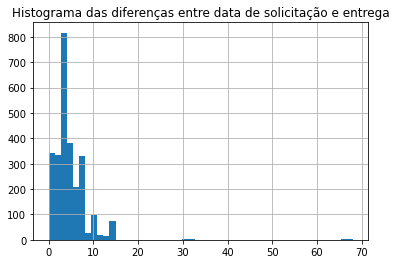

In [64]:
(respiradores.DATA_ENTREGA - respiradores.DATA).dt.days.hist(bins=50)
plt.title("Histograma das diferenças entre data de solicitação e entrega")
plt.show()

# Salvar novo dataset

In [65]:
describe(respiradores)

Quantidade de linhas: 2651


variable            type   na  na_pct  unique  \
0                DATA  datetime64[ns]    0    0.0%     125   
1          FORNECEDOR        category    0    0.0%      27   
2             DESTINO        category    5   0.19%      27   
3    ESTADO_MUNICIPIO        category    5   0.19%       2   
4                TIPO        category    0    0.0%       3   
5          QUANTIDADE           int64    0    0.0%      52   
6               VALOR         float64    0    0.0%     120   
7        DESTINATARIO          object    0    0.0%    1739   
8                  UF          object    5   0.19%      31   
9        DATA_ENTREGA  datetime64[ns]    4   0.15%     262   
10    DESTINO_INTERNO            bool    0    0.0%       2   
11  TIPO_DESTINATARIO          object    0    0.0%      41   
12          MUNICIPIO          object  585  22.07%    1023   

                    min               quat25               median  \
0   2020-04-10 00:00:00  2020-07-07 00:00:00  2020-08-14 00:00:00   
1                     -                    -                    -   
2                     -                    -                    -   
3                     -                    -                    -   
4                     -                    -                    -   
5                     1                  2.0                  3.0   
6               20000.0              60000.0             120000.0   
7                     -                    -                    -   
8                     -                    -                    -   
9   2020-04-10 00:00:00  2020-07-13 00:00:00  2020-08-18 00:00:00   
10                False                  1.0                  1.0   
11                    -                    -                    -   
12                    -                    -                    -   

                             mean               quat75                  max  \
0   2020-10-02 09:24:22.542436864  2021-01-28 00:00:00  2021-04-23 00:00:00   
1                               -                    -                    -   
2                               -                    -                    -   
3                               -                    -                    -   
4                               -                    -                    -   
5                        7.052056                  6.0                  300   
6                   360712.670792             300000.0           14487000.0   
7                               -                    -                    -   
8                               -                    -                    -   
9   2020-10-07 01:27:35.156781312  2021-02-01 00:00:00  2021-04-24 00:00:00   
10                       0.998114                  1.0                 True   
11                              -                    -                    -   
12                              -                    -                    -   

                            std skewness kurtosis media_desvio  
0   109 days 07:20:50.249434186        -        -            -  
1                             -        -        -            -  
2                             -        -        -            -  
3                             -        -        -            -  
4                             -        -        -            -  
5                     13.513024     8.32    125.5         0.52  
6                  706536.02158     6.73    81.62         0.51  
7                             -        -        -            -  
8                             -        -        -            -  
9   108 days 13:54:53.988322668        -        -            -  
10                     0.043396        -        -            -  
11                            -        -        -            -  
12                            -        -        -            -

In [66]:
write_table_from_pandas(respiradores,"../data/interim/respiradores.parquet")